#### 181180760 ALİ HADİ ALTUNGÖK
#### 181180011 UFUK BAKAN
#### Ekans

In [1]:
# Importing required libraries:
import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from matplotlib.lines import Line2D

# Ignore high degree polynomial warnings :
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("bestsellers with categories.csv") # loading data set from local file
# https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

# Getting Familiar with Database

In [3]:
data.head(15) # first 15 rows

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
data.shape # (Total rows, total columns)

(550, 7)

In [5]:
# Are there any missing values?
data.isnull().sum()
# Answer is "No."

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
print("Total reviews: " + str(data["Reviews"].sum()))

Total reviews: 6574305


In [7]:
print("Min User Rating :",data["User Rating"].min(),"  Max User Rating",data["User Rating"].max())
print("Min Reviews :",data["Reviews"].min(),"  Max Reviews",data["Reviews"].max())
print("Min Price :",data["Price"].min(),"  Max Price",data["Price"].max())

Min User Rating : 3.3   Max User Rating 4.9
Min Reviews : 37   Max Reviews 87841
Min Price : 0   Max Price 105


# What are the books with the highest user-rating/price ratio ?
### We didn't calculate user rating / price ratio for free books since they have an infinite ratio


In [8]:
pd.options.mode.chained_assignment = None  # default='warn'
copy_data=data.copy() # We created a copy of data to make changes on it
copy_data["User Rating / Price"] = np.nan # create a new column to store ratio value

for i in range(0,len(data)):
    if(copy_data["Price"][i] > 0): # If price bigger than zero
        ratio = copy_data["User Rating"][i] / copy_data["Price"][i] # Divide User Rating by Price
        copy_data["User Rating / Price"][i] = ratio # Store it in column

# Sort the books in descending order by User Rating / Price
copy_data.sort_values(by="User Rating / Price",ascending=False,axis=0,inplace=True)
# Display first 15 rows:
copy_data.head(15)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User Rating / Price
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction,4.500000
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction,2.400000
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction,2.300000
103,Fear: Trump in the White House,Bob Woodward,4.4,6042,2,2018,Non Fiction,2.200000
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009,Fiction,2.200000
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010,Fiction,2.200000
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,1.566667
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction,1.225000
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,1.225000
124,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2016,Fiction,1.200000


### User Rating tends to decrease as the price increases

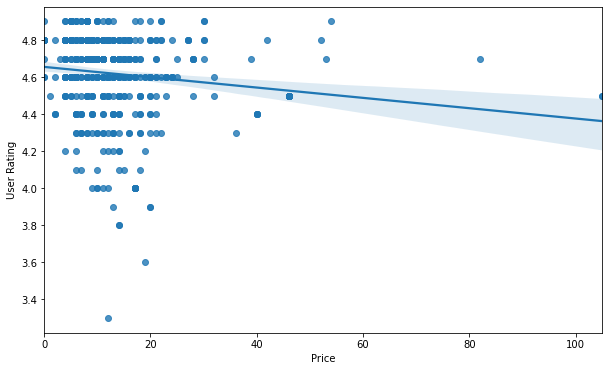

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=72)
# a quick linear regression to show negative correlation
seaborn.regplot(data=data, x='Price', y='User Rating')
fig.fontsize=14
plt.show()

##  Whose book is the most cheap/expensive for each year?


In [10]:
copy_data=data.copy() # Make a copy of data to make changes on it
copy_data.drop(['User Rating','Reviews','Genre'], axis=1,inplace=True) # Drop columns not needed to display
copy_data=copy_data.sort_values(by=["Year","Price"],axis=0) # Sort by Year AND Price in ascending order

In [11]:
for i in range(2009,2020,1):   
    this_years_books = copy_data[copy_data['Year']==i] # Books of the year i
    # There are 50 books per year
    # They are sorted by price already so
    # Index 0 is the cheapest book
    # Index 49 is the most expensive book
    lowest_price = this_years_books.iloc[0]["Price"] # Lowest price of the year i
    print("The cheapest book/books and their authors of the year " + str(i) + " :")
    display(this_years_books[this_years_books.Price == lowest_price]) # Books with the lowest price
    highest_price = this_years_books.iloc[49]["Price"] # Highest price of the year i
    print("The most expensive book/books and their authors of the year " + str(i) + " :")
    display(this_years_books[this_years_books.Price == highest_price]) # Books with the highest price

The cheapest book/books and their authors of the year 2009 :


,Name,Author,Price,Year
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,1,2009


The most expensive book/books and their authors of the year 2009 :


,Name,Author,Price,Year
473,The Twilight Saga Collection,Stephenie Meyer,82,2009


The cheapest book/books and their authors of the year 2010 :


,Name,Author,Price,Year
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,0,2010


The most expensive book/books and their authors of the year 2010 :


,Name,Author,Price,Year
272,Publication Manual of the American Psychologic...,American Psychological Association,46,2010


The cheapest book/books and their authors of the year 2011 :


,Name,Author,Price,Year
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,0,2011


The most expensive book/books and their authors of the year 2011 :


,Name,Author,Price,Year
273,Publication Manual of the American Psychologic...,American Psychological Association,46,2011


The cheapest book/books and their authors of the year 2012 :


,Name,Author,Price,Year
119,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,5,2012


The most expensive book/books and their authors of the year 2012 :


,Name,Author,Price,Year
274,Publication Manual of the American Psychologic...,American Psychological Association,46,2012


The cheapest book/books and their authors of the year 2013 :


,Name,Author,Price,Year
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,0,2013
505,To Kill a Mockingbird,Harper Lee,0,2013


The most expensive book/books and their authors of the year 2013 :


,Name,Author,Price,Year
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105,2013


The cheapest book/books and their authors of the year 2014 :


,Name,Author,Price,Year
116,Frozen (Little Golden Book),RH Disney,0,2014
193,JOURNEY TO THE ICE P,RH Disney,0,2014
219,Little Blue Truck,Alice Schertle,0,2014
506,To Kill a Mockingbird,Harper Lee,0,2014


The most expensive book/books and their authors of the year 2014 :


,Name,Author,Price,Year
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,105,2014


The cheapest book/books and their authors of the year 2015 :


,Name,Author,Price,Year
507,To Kill a Mockingbird,Harper Lee,0,2015


The most expensive book/books and their authors of the year 2015 :


,Name,Author,Price,Year
277,Publication Manual of the American Psychologic...,American Psychological Association,46,2015


The cheapest book/books and their authors of the year 2016 :


,Name,Author,Price,Year
358,The Constitution of the United States,Delegates of the Constitutional,0,2016
508,To Kill a Mockingbird,Harper Lee,0,2016


The most expensive book/books and their authors of the year 2016 :


,Name,Author,Price,Year
151,Hamilton: The Revolution,Lin-Manuel Miranda,54,2016


The cheapest book/books and their authors of the year 2017 :


,Name,Author,Price,Year
381,The Getaway,Jeff Kinney,0,2017


The most expensive book/books and their authors of the year 2017 :


,Name,Author,Price,Year
279,Publication Manual of the American Psychologic...,American Psychological Association,46,2017


The cheapest book/books and their authors of the year 2018 :


,Name,Author,Price,Year
103,Fear: Trump in the White House,Bob Woodward,2,2018


The most expensive book/books and their authors of the year 2018 :


,Name,Author,Price,Year
280,Publication Manual of the American Psychologic...,American Psychological Association,46,2018


The cheapest book/books and their authors of the year 2019 :


,Name,Author,Price,Year
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4,2019
127,Giraffes Can't Dance,Giles Andreae,4,2019
179,If Animals Kissed Good Night,Ann Whitford Paul,4,2019
491,The Wonky Donkey,Craig Smith,4,2019
522,Unicorn Coloring Book: For Kids Ages 4-8 (US E...,Silly Bear,4,2019


The most expensive book/books and their authors of the year 2019 :


,Name,Author,Price,Year
267,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,27,2019


## Which one is the most popular genre in the last 11 years?

Total number of books by their genre
Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


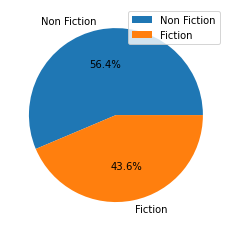

In [12]:
print("Total number of books by their genre")
genre_counts = data["Genre"].value_counts()
print(data["Genre"].value_counts())
plt.pie(genre_counts,labels=["Non Fiction","Fiction"],autopct='%1.1f%%')
plt.legend()
plt.show() # 56% percent of bestselling books are non fiction

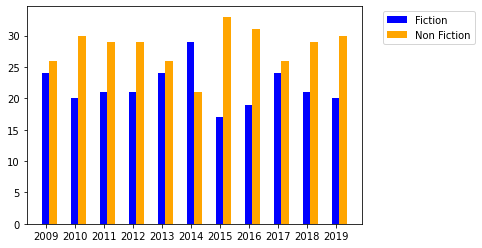

In [13]:
for i in range(2009,2020,1):   
    this_years_books = data[data['Year']==i]
    plt.bar(x=i,width=0.25,height=this_years_books[this_years_books.Genre == "Fiction"].count(),color="blue")
    plt.bar(x=i+0.25,width=0.25,height=this_years_books[this_years_books.Genre == "Non Fiction"].count(),color="orange")
plt.xticks(range(2009,2020))
plt.legend(["Fiction","Non Fiction"],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Only in 2014 fiction books sold more than non fiction ones

## Who is the most commented author for each year?

In [14]:
data=pd.read_csv("bestsellers with categories.csv")
copy_data=data.copy()
copy_data=copy_data.sort_values(by=["Year"],axis=0)

for i in range(2009,2020,1):
    book_names= copy_data[copy_data['Year']==i]["Name"] ## Column for Names from year i
    reviews=copy_data[copy_data['Year']==i]["Reviews"] ## Column for Reviews from year i
    author=copy_data[copy_data['Year']==i]["Author"]## Column for Author from year i
    df1 = pd.concat([book_names,reviews, author], axis=1)##Merge of rewiews and its author from year i
    print("Year :",i,"\nBook :",df1[df1['Reviews']==reviews.max()]["Name"].iloc[0],"\nReviews :",reviews.max()
          ,"\nMost commented Author : ",df1[df1['Reviews']==reviews.max()]["Author"].iloc[0])##Max Rewiews in year i and author of that comment
    print("----------------------")

Year : 2009 
Book : The Shack: Where Tragedy Confronts Eternity 
Reviews : 19720 
Most commented Author :  William P. Young
----------------------
Year : 2010 
Book : The Hunger Games 
Reviews : 32122 
Most commented Author :  Suzanne Collins
----------------------
Year : 2011 
Book : The Hunger Games (Book 1) 
Reviews : 32122 
Most commented Author :  Suzanne Collins
----------------------
Year : 2012 
Book : Gone Girl 
Reviews : 57271 
Most commented Author :  Gillian Flynn
----------------------
Year : 2013 
Book : Gone Girl 
Reviews : 57271 
Most commented Author :  Gillian Flynn
----------------------
Year : 2014 
Book : Gone Girl 
Reviews : 57271 
Most commented Author :  Gillian Flynn
----------------------
Year : 2015 
Book : The Girl on the Train 
Reviews : 79446 
Most commented Author :  Paula Hawkins
----------------------
Year : 2016 
Book : The Girl on the Train 
Reviews : 79446 
Most commented Author :  Paula Hawkins
----------------------
Year : 2017 
Book : The Handmaid

# A person wants to purchase a random book from the list Amazon top 50 best selling books. What are the odds that his book will be on fiction genre, under 10(dollar) and rated over 4,5? 

In [15]:
total_books = data.shape[0] #550
probabilities = data[(data.Genre == "Fiction") & (data.Price < 10) & (data["User Rating"] > 4.5)]
print("Matching books:",probabilities.shape[0])
print("Probability: %" + "%.2f" % ((probabilities.shape[0] / total_books) * 100))


Matching books: 106
Probability: %19.27


# Predict user rating of a new book using these features :
# Author, reviews, price, year, genre

In [16]:
# x features, we are going to predict user rating so drop it :
x = data.drop(["User Rating"],1)
# y outputs :
y = data["User Rating"]

# split train and test data (WITH STRING DATA):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# we still store name column in x_train and x_test we will use it end of the results
# but we won't use name to calculate PCA value in x_int_train and x_int_test

# since almost every book has a different name we didn't consider it as a feature and dropped it:
x = x.drop("Name",1)

le= preprocessing.LabelEncoder()
author_integer = le.fit_transform(x["Author"])
x["Author"] = author_integer
genre_integer = le.fit_transform(x["Genre"])
x["Genre"] = genre_integer

# split train and test data (WITHOUT STRINGS, ONLY INTEGERS) :
x_int_train, x_int_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# We didn't rename y_train to y_int_train because y_train already contains only numbers.
# no output block

In [17]:
# Create a PCA object to fit all features in one column :
pca = PCA(n_components=1)
# Fit, and transform dimensions of values then reassign x_train data:
x_int_train = pca.fit_transform(x_int_train)
# Fit, and transform dimensions of values then reassign x_test data:
x_int_test = pca.fit_transform(x_int_test) 
# If this block fails please rerun only this block, its a windows kernel bug

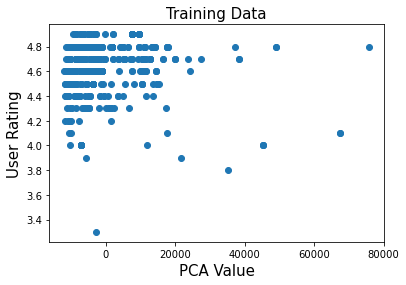

In [18]:
plt.scatter(x_int_train,y_train)
plt.title("Training Data",fontsize=15)
plt.xlabel("PCA Value",fontsize=15)
plt.ylabel("User Rating",fontsize=15)
plt.show()

### Now we are going to predicty by both linear and polynomial algorithms and compare them

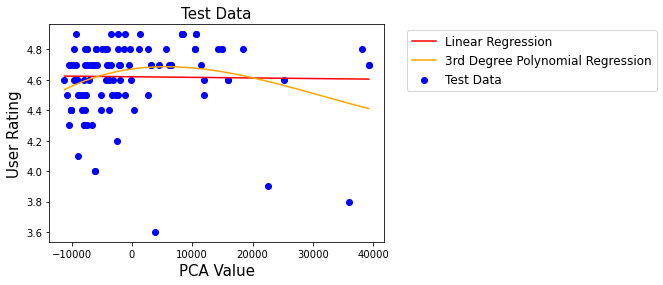

In [19]:
# create a linear regression model :
lin_reg = LinearRegression()
# train the model :
lin_reg.fit(x_int_train,y_train)

# create a 3rd degree polynomial prediction model:
poly3model = make_pipeline(PolynomialFeatures(degree=3), Ridge())
# train the model :
poly3model.fit(x_int_train, y_train)

# set a interval to draw curve from predicted values :
x_plot = np.arange(x_int_test.min(),x_int_test.max()).reshape(-1,1) # from min to max value of test data make predicts
# polynomial predict values on interval :
y_predict = poly3model.predict(x_plot)

# scatter original test values :
plt.scatter(x_int_test,y_test,label="Test Data",color="blue")
# plot linear regression predicts :
plt.plot(x_plot,lin_reg.predict(x_plot),color='red',label="Linear Regression")
# plot polynomial prediction curve :
plt.plot(x_plot,y_predict,color="orange",label="3rd Degree Polynomial Regression")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',fontsize=12)
plt.title("Test Data",fontsize=15)
plt.xlabel("PCA Value",fontsize=15)
plt.ylabel("User Rating",fontsize=15)
plt.show()

In [20]:
print("There is",x_test.shape[0],"test data")
# create a comparision table :
compare_data = x_test.copy()
compare_data["User Rating"] = y_test
# predict using integer values of features and assign it to new column :
compare_data["Poly Predicted User Rating"] = poly3model.predict(x_int_test)
compare_data["Linear Predicted User Rating"] = lin_reg.predict(x_int_test)
# assign PCA values so we can recheck it on graph also :
compare_data["PCA Value"] = x_int_test
pd.options.display.max_rows = None
display(compare_data.sort_values(by="PCA Value"))

There is 110 test data


,Name,Author,Reviews,Price,Year,Genre,User Rating,Poly Predicted User Rating,Linear Predicted User Rating,PCA Value
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,37,6,2009,Non Fiction,4.6,4.535551,4.624856,-11178.783305
512,True Compass: A Memoir,Edward M. Kennedy,438,15,2009,Non Fiction,4.5,4.543263,4.624698,-10777.723503
444,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,807,36,2016,Non Fiction,4.3,4.550154,4.624553,-10408.782754
346,The Book of Basketball: The NBA According to T...,Bill Simmons,858,53,2009,Non Fiction,4.7,4.551093,4.624533,-10357.712377
299,Sookie Stackhouse,Charlaine Harris,973,25,2009,Fiction,4.7,4.553193,4.624488,-10242.710110
439,The Official SAT Study Guide,The College Board,1201,40,2010,Non Fiction,4.4,4.557300,4.624398,-10014.783874
441,The Official SAT Study Guide,The College Board,1201,40,2012,Non Fiction,4.4,4.557300,4.624398,-10014.783777
443,The Official SAT Study Guide,The College Board,1201,40,2014,Non Fiction,4.4,4.557300,4.624398,-10014.783680
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,1463,10,2011,Fiction,4.7,4.561932,4.624295,-9752.765768
134,Going Rogue: An American Life,Sarah Palin,1636,6,2009,Non Fiction,4.6,4.564937,4.624227,-9579.769874


# Predict price of a new book using these features :
# Author, reviews, user rating, year, genre

In [21]:
# x features, we are going to predict user rating so drop it :
x = data.drop(["Price"],1)
# y outputs :
y = data["Price"]
# We want to get rid of outliers because there are too expensive books and free books which may mislead our algorithm:
no_outliers = y.between(y.quantile(.05), y.quantile(.95))
x = x[no_outliers]
y = y[no_outliers]

# split train and test data (WITH STRING DATA):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# we still store name column in x_train and x_test we will use it end of the results
# but we won't use name to calculate PCA value in x_int_train and x_int_test

# since almost every book has a different name we didn't consider it as a feature and dropped it:
x = x.drop("Name",1)

le= preprocessing.LabelEncoder()
author_integer = le.fit_transform(x["Author"])
x["Author"] = author_integer
genre_integer = le.fit_transform(x["Genre"])
x["Genre"] = genre_integer

# split train and test data (WITHOUT STRINGS, ONLY INTEGERS) :
x_int_train, x_int_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# We didn't rename y_train to y_int_train because y_train already contains only numbers.
# no output

In [22]:
# Create a PCA object to fit all features in one column :
pca = PCA(n_components=1)
# Fit, and transform dimensions of values then reassign x_train data:
x_int_train = pca.fit_transform(x_int_train)
# Fit, and transform dimensions of values then reassign x_test data:
x_int_test = pca.fit_transform(x_int_test)
# no output
# If this block fails please rerun only this block, its a windows kernel bug

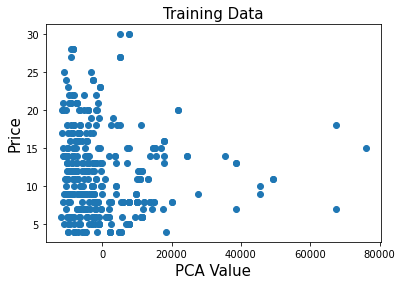

In [23]:
plt.scatter(x_int_train,y_train)
plt.title("Training Data",fontsize=15)
plt.xlabel("PCA Value",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

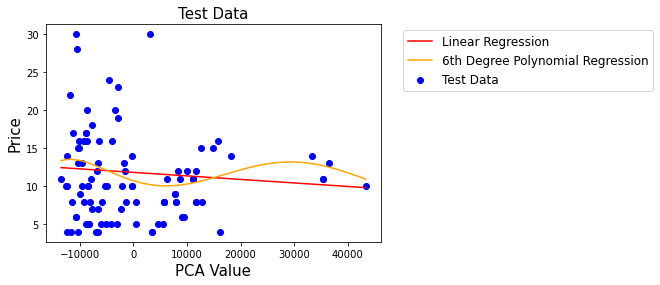

In [24]:
# create a linear regression model :
lin_reg = LinearRegression()
# train the model :
lin_reg.fit(x_int_train,y_train)

# create a 6th degree polynomial prediction model:
poly6model = make_pipeline(PolynomialFeatures(degree=6), Ridge())
# train the model :
poly6model.fit(x_int_train, y_train)

# set a interval to draw curve from predicted values :
x_plot = np.arange(x_int_test.min(),x_int_test.max()).reshape(-1,1) # from min to max value of test data make predicts
# polynomial predict values on interval :
y_predict = poly6model.predict(x_plot)

# scatter original test values :
plt.scatter(x_int_test,y_test,label="Test Data",color="blue")
# plot linear regression predicts :
plt.plot(x_plot,lin_reg.predict(x_plot),color='red',label="Linear Regression")
# plot polynomial prediction curve :
plt.plot(x_plot,y_predict,color="orange",label="6th Degree Polynomial Regression")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',fontsize=12)
plt.title("Test Data",fontsize=15)
plt.xlabel("PCA Value",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

In [25]:
print("There is",x_test.shape[0],"test data")
# create a comparision table :
compare_data = x_test.copy()
compare_data["Price"] = y_test
# predict using integer values of features and assign it to new column :
compare_data["Poly Predicted Price"] = poly6model.predict(x_int_test)
compare_data["Linear Predicted Price"] = lin_reg.predict(x_int_test)
# assign PCA values so we can recheck it on graph also :
compare_data["PCA Value"] = x_int_test
pd.options.display.max_rows = None
display(compare_data.sort_values(by="PCA Value"))

There is 101 test data


,Name,Author,User Rating,Reviews,Year,Genre,Price,Poly Predicted Price,Linear Predicted Price,PCA Value
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,2010,Non Fiction,11,13.367249,12.456447,-13505.182591
58,Daring Greatly: How the Courage to Be Vulnerab...,Brené Brown,4.8,1329,2013,Non Fiction,10,13.503979,12.415323,-12616.227428
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,2011,Fiction,10,13.515598,12.409121,-12482.154450
60,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,2009,Fiction,4,13.521342,12.405516,-12404.225278
50,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,2009,Non Fiction,14,13.521413,12.405468,-12403.202168
1,11/22/63: A Novel,Stephen King,4.6,2052,2011,Fiction,22,13.541493,12.381872,-11893.144340
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,2016,Non Fiction,4,13.540721,12.369803,-11632.237133
18,Adult Coloring Books: A Coloring Book for Adul...,Coloring Books for Adults,4.5,2426,2015,Non Fiction,8,13.538208,12.364574,-11519.220074
446,The Pioneer Woman Cooks: A Year of Holidays: 1...,Ree Drummond,4.8,2663,2013,Non Fiction,17,13.528844,12.353607,-11282.154976
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,2017,Fiction,30,13.493655,12.331265,-10799.190476


# Predict genre of a new book using that features:
# Author, User Rating, Reviews, Price, Year, Name

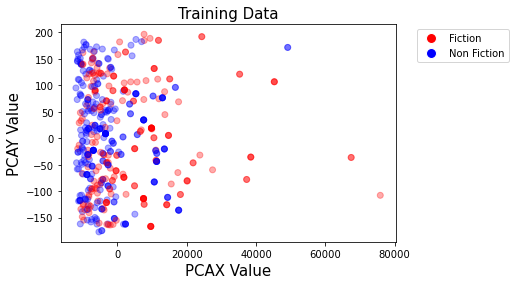

In [26]:
copy_data=data.copy()
x=copy_data[["Name","Author","User Rating","Reviews","Price","Year"]]
y=copy_data[["Genre"]]

# x_train and x_test with STRING values :
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=0)

# Converting string values to INTEGER values :
name = le.fit_transform(x["Name"])
author = le.fit_transform(x["Author"])
x["Name"]=name
x["Author"]=author

# y_color array to scatter class by colors :
y_color = []

def convertToColor(genre):
    if (genre == "Fiction"):
        return "red"
    else:
        return "blue"

for genre in y["Genre"]:
    y_color = np.append(y_color,convertToColor(genre))

# x train, x test without STRING values :
x_int_train, x_int_test, y_train, y_test = train_test_split(x, y_color, test_size=0.05, random_state=0)

# Convert 5 features to 2 features :
pca2 = PCA(n_components=2)
x_int_train = pca2.fit_transform(x_int_train) # each element has 2 features
x_int_test = pca2.fit_transform(x_int_test) # each element has 2 features

# get features from array to seperate variables :
train_pcax, train_pcay = zip(*x_int_train)
test_pcax, test_pcay = zip(*x_int_test)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_int_train, y_train)

plt.title("Training Data",fontsize=15)

plt.scatter(train_pcax,train_pcay,c=y_train,alpha=0.33)
plt.xlabel("PCAX Value",fontsize=15)
plt.ylabel("PCAY Value",fontsize=15)
legend_elements = [Line2D([0], [0], marker='o', color='w',markerfacecolor='red',markersize=10, label='Fiction'),
                          Line2D([0], [0], marker='o', color='w',markerfacecolor='blue',markersize=10, label='Non Fiction')]
plt.legend(handles=legend_elements,bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

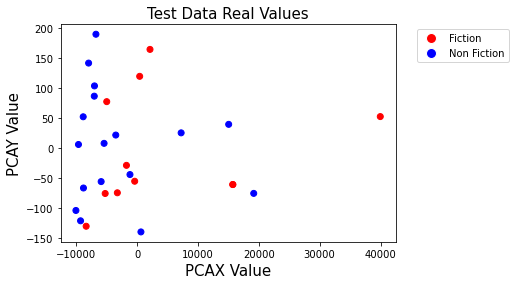

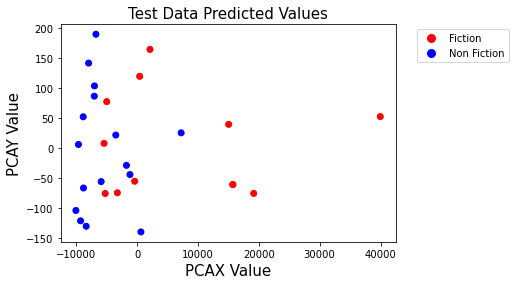

In [27]:
y_predict = neigh.predict(x_int_test)

plt.scatter(test_pcax,test_pcay,c=y_test)
#plt.plot(x_plot,y_predict,color='green', alpha=0.2)
plt.title("Test Data Real Values",fontsize=15)
plt.xlabel("PCAX Value",fontsize=15)
plt.ylabel("PCAY Value",fontsize=15)
plt.legend(handles=legend_elements,bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()
plt.scatter(test_pcax,test_pcay,c=y_predict)
#plt.plot(x_plot,y_predict,color='green', alpha=0.2)
plt.title("Test Data Predicted Values",fontsize=15)
plt.xlabel("PCAX Value",fontsize=15)
plt.ylabel("PCAY Value",fontsize=15)
plt.legend(handles=legend_elements,bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

In [28]:
compare_table = x_test.copy()
compare_table["Genre"] = y_test
compare_table["KNN Predicted Genre"] = y_predict

print("Genre red = fiction, blue = non fiction")
true_prediction_count = compare_table[compare_table["Genre"] == compare_table["KNN Predicted Genre"]].shape[0]
print("True predictions :",true_prediction_count)
print("Total predictions :",compare_table.shape[0])
success_rate = true_prediction_count / compare_table.shape[0] * 100
print("Prediction success rate: " + "%.2f" % success_rate)

display(compare_table)

Genre red = fiction, blue = non fiction
True predictions : 23
Total predictions : 28
Prediction success rate: 82.14


,Name,Author,User Rating,Reviews,Price,Year,Genre,KNN Predicted Genre
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,red,red
441,The Official SAT Study Guide,The College Board,4.4,1201,40,2012,blue,blue
96,Eclipse (Twilight),Stephenie Meyer,4.7,5505,18,2009,red,red
172,Humans of New York,Brandon Stanton,4.8,3490,15,2013,blue,blue
134,Going Rogue: An American Life,Sarah Palin,4.6,1636,6,2009,blue,blue
37,Born to Run,Bruce Springsteen,4.7,3729,18,2016,blue,blue
391,The Going-To-Bed Book,Sandra Boynton,4.8,5249,5,2017,red,red
90,Drive: The Surprising Truth About What Motivat...,Daniel H. Pink,4.5,2525,16,2010,blue,blue
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,red,red
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,blue,red
